# Table of Contents
1. [Feature Engineering](#feature-Engineering)
2. [EDA](#EDA)
    * [Determining the Use of Raw or Scaled Columns/Datasets](#determining-the-use-of-raw-or-scaled-columnsdatasets)
3. [Feature Engineering](#feature-engineering)
4. [Cluster Models](#cluster-Models)
5. [Analysis of Cluster Models Results Comparation](#analysis-of-cluster-results-comparation)
6. [Conclusion](#conclusion)


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# comple df
df = pd.read_csv('Sales_Transactions_Dataset_Weekly.csv')
# Label
label = df['Product_Code']
# Dataframe RAW
dfr = df[df.columns[1:53]]
# Dataframe Normalized
dfn = df.drop(df.columns[0:55], axis=1) # this is a normalized data

# EDA

In [2]:
df.isnull().sum().value_counts()

0    107
Name: count, dtype: int64

In [3]:
df

,Product_Code,W0,W1,W2,W3,W4,W5,W6,W7,W8,...,Normalized 42,Normalized 43,Normalized 44,Normalized 45,Normalized 46,Normalized 47,Normalized 48,Normalized 49,Normalized 50,Normalized 51
0,P1,11,12,10,8,13,12,14,21,6,...,0.06,0.22,0.28,0.39,0.50,0.00,0.22,0.17,0.11,0.39
1,P2,7,6,3,2,7,1,6,3,3,...,0.20,0.40,0.50,0.10,0.10,0.40,0.50,0.10,0.60,0.00
2,P3,7,11,8,9,10,8,7,13,12,...,0.27,1.00,0.18,0.18,0.36,0.45,1.00,0.45,0.45,0.36
3,P4,12,8,13,5,9,6,9,13,13,...,0.41,0.47,0.06,0.12,0.24,0.35,0.71,0.35,0.29,0.35
4,P5,8,5,13,11,6,7,9,14,9,...,0.27,0.53,0.27,0.60,0.20,0.20,0.13,0.53,0.33,0.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
806,P815,0,0,1,0,0,2,1,0,0,...,0.00,0.33,0.33,0.00,0.00,0.33,0.00,0.00,0.67,0.00
807,P816,0,1,0,0,1,2,2,6,0,...,0.43,0.43,0.57,0.29,0.57,0.71,0.71,0.71,0.86,0.71
808,P817,1,0,0,0,1,1,2,1,1,...,0.50,0.00,0.00,0.50,0.50,0.00,0.00,0.00,1.00,0.75
809,P818,0,0,0,1,0,0,0,0,1,...,0.00,0.00,0.00,0.50,0.50,0.00,0.00,0.00,1.00,0.00


In [4]:
df.columns

Index(['Product_Code', 'W0', 'W1', 'W2', 'W3', 'W4', 'W5', 'W6', 'W7', 'W8',
       ...
       'Normalized 42', 'Normalized 43', 'Normalized 44', 'Normalized 45',
       'Normalized 46', 'Normalized 47', 'Normalized 48', 'Normalized 49',
       'Normalized 50', 'Normalized 51'],
      dtype='object', length=107)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 811 entries, 0 to 810
Columns: 107 entries, Product_Code to Normalized 51
dtypes: float64(52), int64(54), object(1)
memory usage: 678.1+ KB


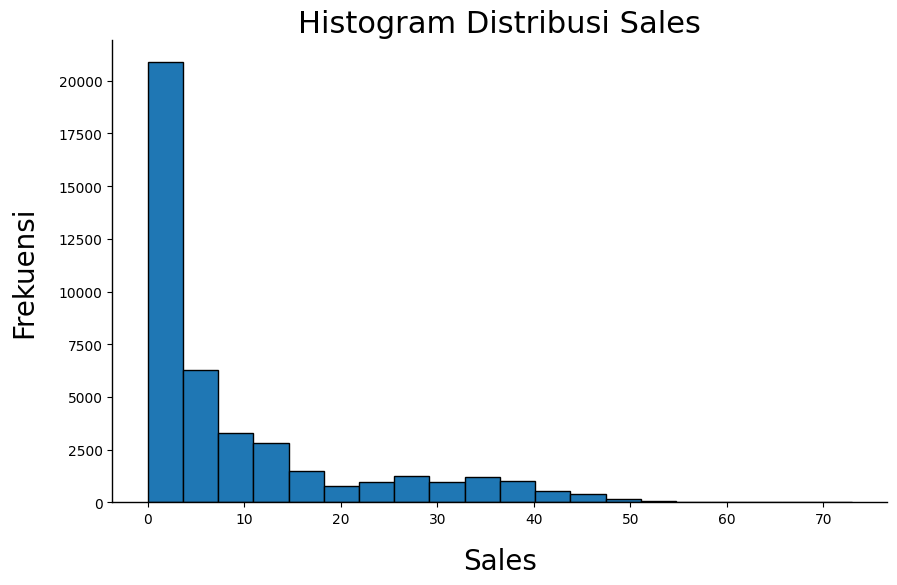

In [6]:
# Histogram of sales distribution
plt.figure(figsize=(10, 6))
plt.hist(dfr[dfr.columns].values.flatten(), bins=20, edgecolor='black')
plt.title('Histogram Distribusi Sales', fontsize=22)
plt.xlabel('Sales', fontsize=20, labelpad=15)
plt.ylabel('Frekuensi', fontsize=20, labelpad=15)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(1.0)
ax.spines['bottom'].set_linewidth(1.0)
ax.spines['left'].set_edgecolor('black')
ax.spines['bottom'].set_edgecolor('black')
plt.show()

### Sales Each Week

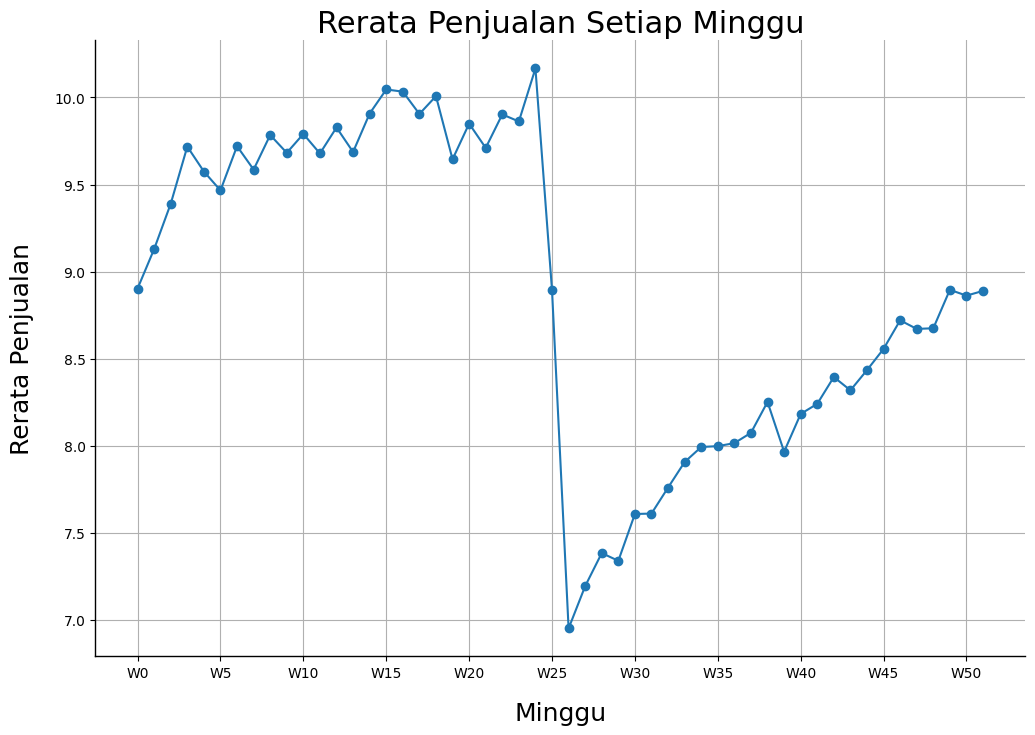

In [7]:
plt.figure(figsize=(12, 8))
plt.plot(df[df.columns[1:53]].mean(), marker='o', linestyle='-')
plt.title('Rerata Penjualan Setiap Minggu', fontsize=22)
plt.xlabel('Minggu', fontsize=18, labelpad=15)
plt.ylabel('Rerata Penjualan', fontsize=18, labelpad=15)
plt.xticks(range(0, 52, 5))  # Show every 5th week for clarity
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(1.0)
ax.spines['bottom'].set_linewidth(1.0)
ax.spines['left'].set_edgecolor('black')
ax.spines['bottom'].set_edgecolor('black')
plt.grid(True)
plt.show()


This might useful for knowing which product and why some high sales happened like in week 24 and drop significant at week 26, and getting  increase steadily afterwards.
We also can find the reasons of this happened, like its because of Trends or because the Shop itself have a strategy or a problem.

In [8]:
# Sort the DataFrame by sales in week 24
top_5_week_24_sales = df.sort_values(by='W24', ascending=False).head(5)

# Display the top 5 products
print("Top 5 products with the highest sales in week 24:")
print(top_5_week_24_sales[['Product_Code', 'W24']])


Top 5 products with the highest sales in week 24:
    Product_Code  W24
406         P409   64
261         P262   63
612         P615   50
175         P176   46
183         P184   45


The Product_code doesnt show any name of the product that might help for knowing what happened in that specific week.

### BoxPlot 


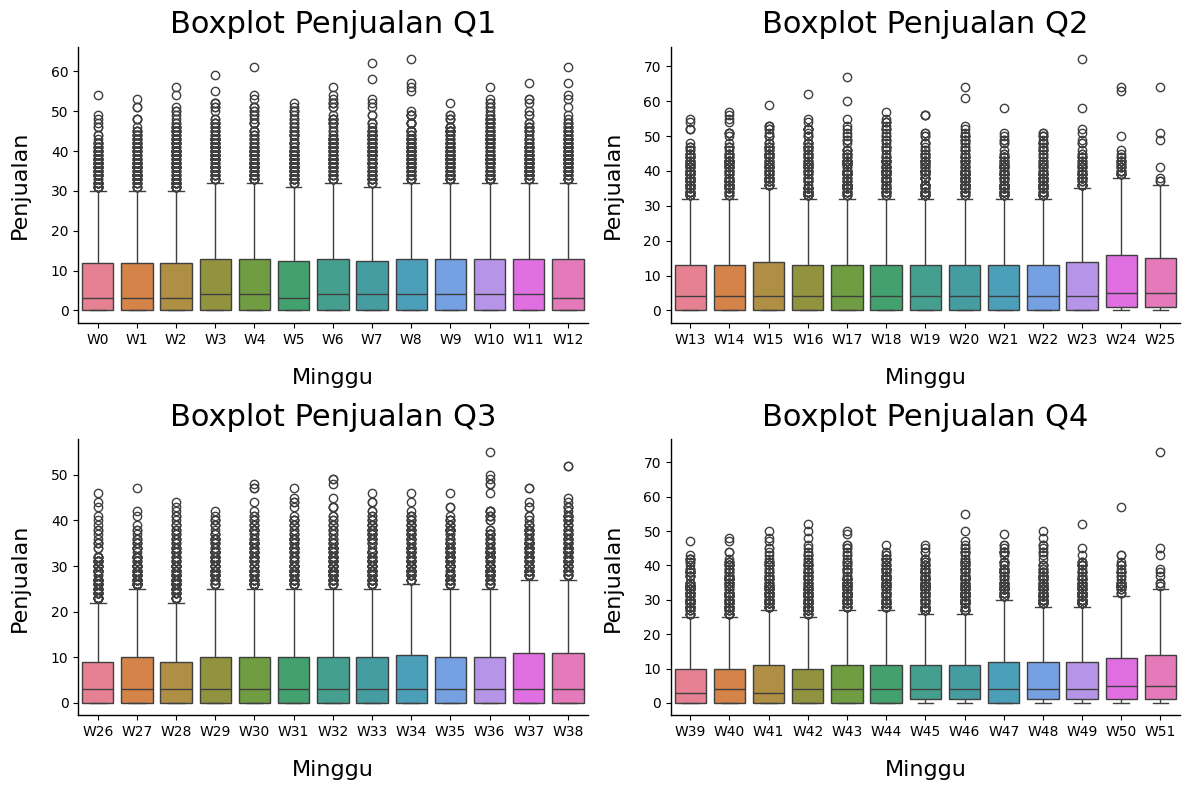

In [9]:
# Split the DataFrame into quarters
quarters = [df[df.columns[1:14]], df[df.columns[14:27]], df[df.columns[27:40]], df[df.columns[40:53]]]
quarter_names = ['Q1', 'Q2', 'Q3', 'Q4']

# Plot boxplots for each quarter
plt.figure(figsize=(12, 8))
for i, quarter in enumerate(quarters):
    plt.subplot(2, 2, i+1)
    sns.boxplot(data=quarter, orient='v')
    plt.title(f'Boxplot Penjualan {quarter_names[i]}', fontsize=22, pad=10)
    plt.ylabel('Penjualan', fontsize=16, labelpad=15)
    plt.xlabel('Minggu', fontsize=16, labelpad=15)
    ax = plt.gca()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_linewidth(1.0)
    ax.spines['bottom'].set_linewidth(1.0)
    ax.spines['left'].set_edgecolor('black')
    ax.spines['bottom'].set_edgecolor('black')

plt.tight_layout()
plt.show()

### Seasonal Decomposition

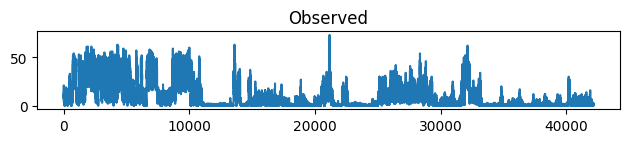

In [10]:
import statsmodels.api as sm

# Assuming 'sales' is your time series data
sales = dfr[dfr.columns].values.flatten()

# Perform seasonal decomposition
result = sm.tsa.seasonal_decompose(sales, model='additive', period=52)


plt.subplot(411)
plt.plot(result.observed)
plt.title('Observed')

plt.tight_layout()
plt.show()


Text(0.5, 1.0, 'Trend')

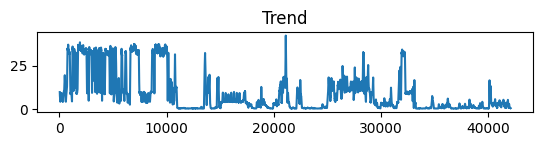

In [11]:
plt.subplot(412)
plt.plot(result.trend)
plt.title('Trend')


Text(0.5, 1.0, 'Residual')

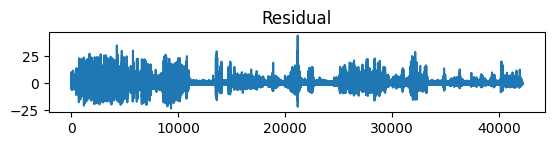

In [12]:
plt.subplot(414)
plt.plot(result.resid)
plt.title('Residual')

#  Feature Engineering

In [13]:
import pandas as pd

# Assuming 'df' is your DataFrame
quarters = [
    df[df.columns[1:14]], 
    df[df.columns[14:27]], 
    df[df.columns[27:40]], 
    df[df.columns[40:53]]
]

# Create new variables for each quarter
quarter_sums = []
for i, quarter in enumerate(quarters, start=1):
    quarter_sum = quarter.sum(axis=1)
    df[f'Q{i}'] = quarter_sum
    quarter_sums.append(quarter_sum)

In [14]:
df[['Q1', 'Q2', 'Q3', 'Q4']].head()

,Q1,Q2,Q3,Q4
0,162,114,118,107
1,51,58,59,39
2,118,119,116,99
3,116,111,100,103
4,128,125,87,100


## Determining the Use of Raw or Scaled Columns/Datasets

### RAW 

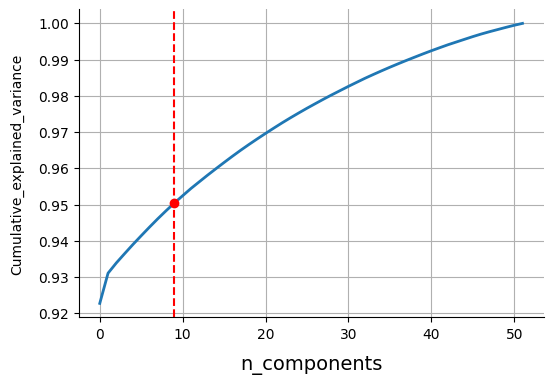

In [36]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=52)
pca_data_pca = pca.fit_transform(dfr)

percentage_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_)
cum_var_explained = np.cumsum(percentage_var_explained)

# Plot the PCA spectrum
plt.figure(1, figsize=(6, 4))

plt.clf()
plt.plot(cum_var_explained, linewidth=2)
plt.axvline(x=9, color='r', linestyle='--')  # Add vertical dashed line at n_components=2
plt.plot(9, cum_var_explained[9], 'ro')  # Add a marker at the point (2, cum_var_explained[2])
plt.axis('tight')
plt.grid()
plt.xlabel('n_components', fontsize=14, labelpad=10)
plt.ylabel('Cumulative_explained_variance', fontsize=10, labelpad=10)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

Using a statistical approach, in this raw data, the cumulative explained variance at 95% of the data is found in 8 components or variables, which is good. And if we use 99%, then the components that will be utilized are around 38.

### Normalized Data

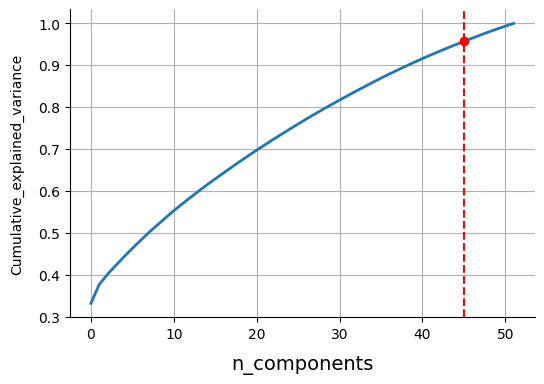

In [37]:
pca.n_components = 52

pca_data_pca = pca.fit_transform(dfn)
percentage_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_);

cum_var_explained = np.cumsum(percentage_var_explained)

# Plot the PCA spectrum
plt.figure(1, figsize=(6, 4))

plt.clf()
plt.plot(cum_var_explained,linewidth=2)
plt.axvline(x=45, color='r', linestyle='--')  # Add vertical dashed line at n_components=2
plt.plot(45, cum_var_explained[45], 'ro')
plt.axis('tight')
plt.grid()
plt.xlabel('n_components', fontsize=14, labelpad=10)
plt.ylabel('Cumulative_explained_variance', fontsize=10, labelpad=10)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

Unlike the previous raw data, in this normalized data, it is very poor. It can be seen that when the components are 8 (based on same treat to the previous raw data), the cumulative variance that can explain the data is only approximately 50%. Whereas, the raw data can achieve a cumulative variance of around 93% with just 2 components.

So, in this case, we find that the raw data is better to use.

Using amount of component that having 95% cumulative explained variance which is 9. To proceed to the next step of modelling.

In [17]:
import pandas as pd
from sklearn.decomposition import PCA

# Initialize PCA with 8 components
pca = PCA(n_components=9)

# Fit and transform the data
pca_data_pca = pca.fit_transform(dfr)

# Create a DataFrame from the transformed data
pca_df = pd.DataFrame(pca_data_pca, columns=[f'Component_{i}' for i in range(1, 10)])

# Display the DataFrame
pca_df


,Component_1,Component_2,Component_3,Component_4,Component_5,Component_6,Component_7,Component_8,Component_9
0,5.321035,-8.330062,2.779222,-5.107983,-1.717254,0.838938,9.762072,-5.351600,3.367828
1,-35.764069,-4.443928,2.923920,-1.216224,-4.456384,-6.073860,-5.371689,2.376494,-1.429348
2,-1.850250,-1.924737,-2.827887,1.525181,3.857702,3.775748,-1.866208,-0.412558,6.720167
3,-4.691024,-3.536827,-1.698912,-1.639692,1.228459,0.688774,0.050716,8.825215,-0.365624
4,-2.953761,1.359967,7.263124,1.299242,8.363740,0.626227,1.804510,-6.922714,0.051397
...,...,...,...,...,...,...,...,...,...
806,-61.135625,-3.821521,1.082522,-0.670821,-0.801314,-1.265771,0.861479,0.929322,0.726854
807,-45.655741,1.680815,-2.457741,-0.631729,-1.828760,-0.742618,2.860964,2.484480,5.659243
808,-60.929080,-1.375648,-0.101451,-1.015930,0.181992,0.650589,-1.125390,0.709463,-0.674797
809,-62.153931,-2.397181,-0.658063,0.322174,0.032914,0.196782,-1.239836,-0.277687,0.225683


# Cluster Models

## Hierarchical Clustering

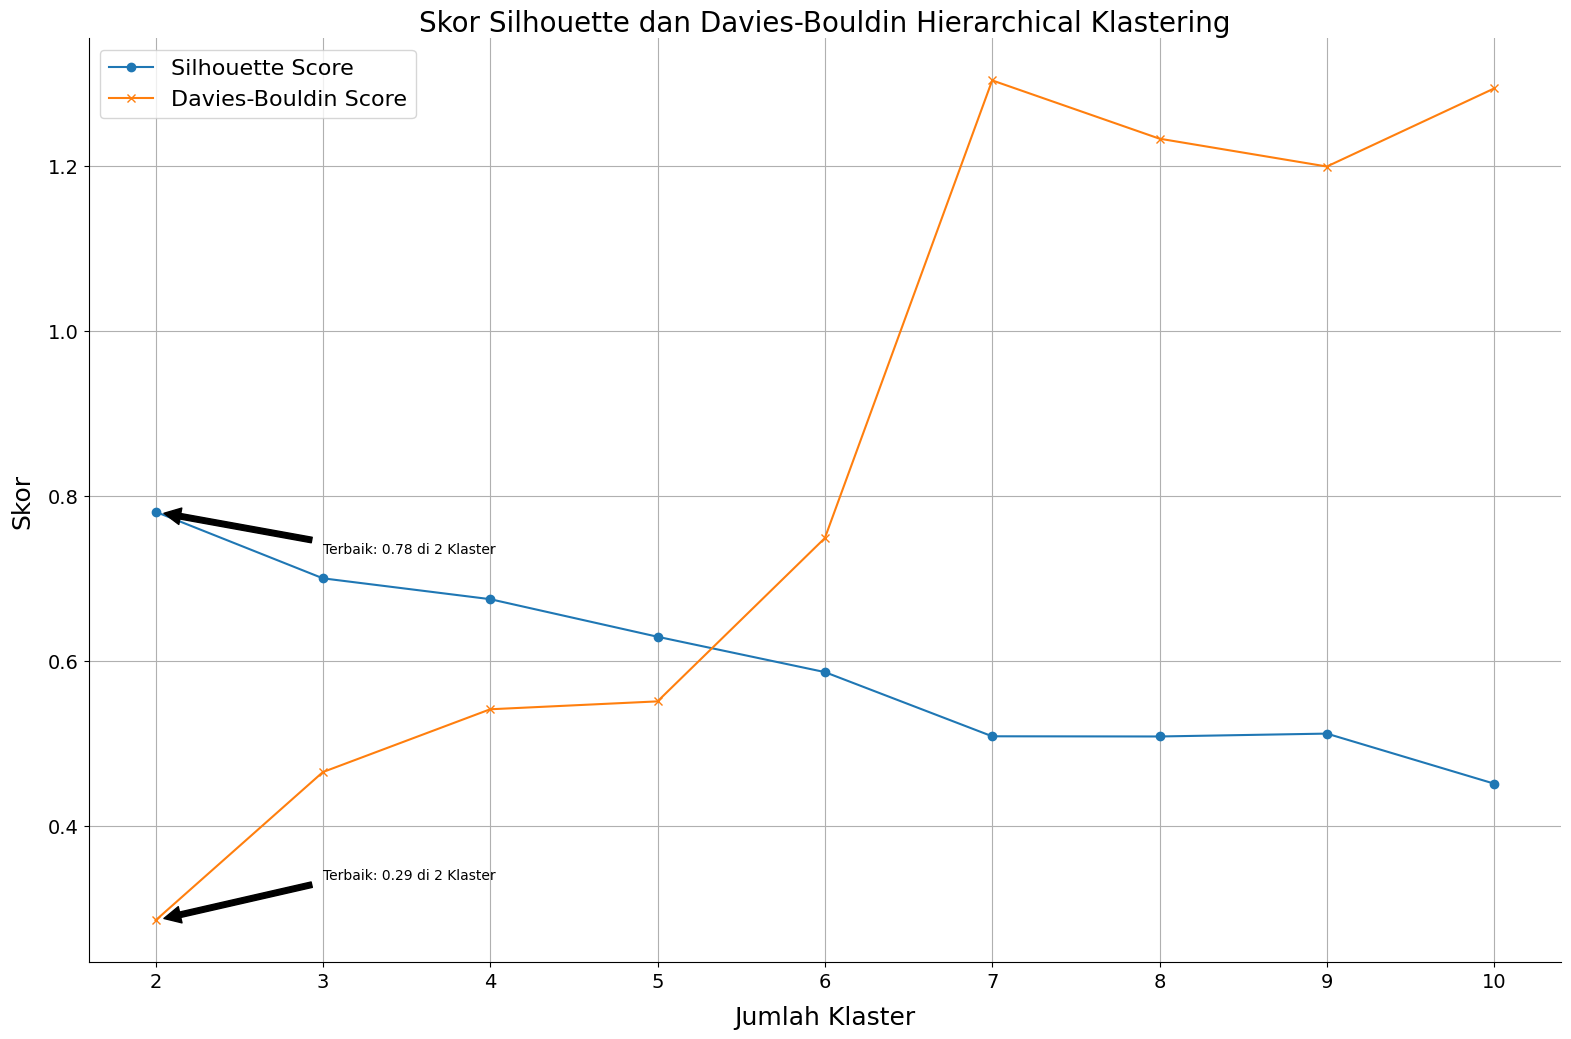

Best silhouette score: 0.7811040821721865
Number of clusters with best silhouette score: 2
Best Davies-Bouldin score: 0.28598307270669654
Number of clusters with best Davies-Bouldin score: 2


In [43]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Define range of cluster numbers to explore
min_clusters = 2
max_clusters = 10
cluster_range = range(min_clusters, max_clusters + 1)

# Initialize lists to store silhouette scores and Davies-Bouldin scores
silhouette_scores = []
davies_bouldin_scores = []

# Iterate over the range of cluster numbers
for n_clusters in cluster_range:
    # Initialize hierarchical clustering model
    clustering = AgglomerativeClustering(n_clusters=n_clusters)

    # Fit the model to the data and predict cluster labels
    clusters = clustering.fit_predict(pca_df)

    # Calculate silhouette score
    silhouette_avg = silhouette_score(pca_df, clusters)
    silhouette_scores.append(silhouette_avg)

    # Calculate Davies-Bouldin score
    davies_bouldin_avg = davies_bouldin_score(pca_df, clusters)
    davies_bouldin_scores.append(davies_bouldin_avg)

# Find the highest silhouette score and its corresponding number of clusters
best_silhouette_score = max(silhouette_scores)
best_davies_bouldin_score = min(davies_bouldin_scores)

best_silhouette_score_index = silhouette_scores.index(best_silhouette_score)
best_davies_bouldin_score_index = davies_bouldin_scores.index(best_davies_bouldin_score)

num_clusters_with_best_silhouette_score = cluster_range[best_silhouette_score_index]
num_clusters_with_best_davies_bouldin_score = cluster_range[best_davies_bouldin_score_index]

# Plot silhouette scores and Davies-Bouldin scores
plt.figure(figsize=(19, 12))
plt.plot(cluster_range, silhouette_scores, marker='o', label='Silhouette Score')
plt.plot(cluster_range, davies_bouldin_scores, marker='x', label='Davies-Bouldin Score')

# Annotate the best silhouette score
plt.annotate(f'Terbaik: {best_silhouette_score:.2f} di {num_clusters_with_best_silhouette_score} Klaster',
             xy=(num_clusters_with_best_silhouette_score, best_silhouette_score),
             xytext=(num_clusters_with_best_silhouette_score + 1, best_silhouette_score - 0.05),
             arrowprops=dict(facecolor='black', shrink=0.05))

# Annotate the best Davies-Bouldin score
plt.annotate(f'Terbaik: {best_davies_bouldin_score:.2f} di {num_clusters_with_best_davies_bouldin_score} Klaster',
             xy=(num_clusters_with_best_davies_bouldin_score, best_davies_bouldin_score),
             xytext=(num_clusters_with_best_davies_bouldin_score + 1, best_davies_bouldin_score + 0.05),
             arrowprops=dict(facecolor='black', shrink=0.05))

plt.title('Skor Silhouette dan Davies-Bouldin Hierarchical Klastering', fontsize=20, pad=5)
plt.xlabel('Jumlah Klaster', fontsize=18, labelpad=10)
plt.ylabel('Skor', fontsize=18, labelpad=10)
plt.xticks(cluster_range, fontsize=14)  # Enlarge xtick labels
plt.yticks(fontsize=14)  # Enlarge ytick labels
plt.grid(True)
plt.legend(fontsize=16)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

# Print the best clustering silhouette score and Davies-Bouldin score, and their corresponding number of clusters
print(f'Best silhouette score: {best_silhouette_score}')
print(f'Number of clusters with best silhouette score: {num_clusters_with_best_silhouette_score}')
print(f'Best Davies-Bouldin score: {best_davies_bouldin_score}')
print(f'Number of clusters with best Davies-Bouldin score: {num_clusters_with_best_davies_bouldin_score}')

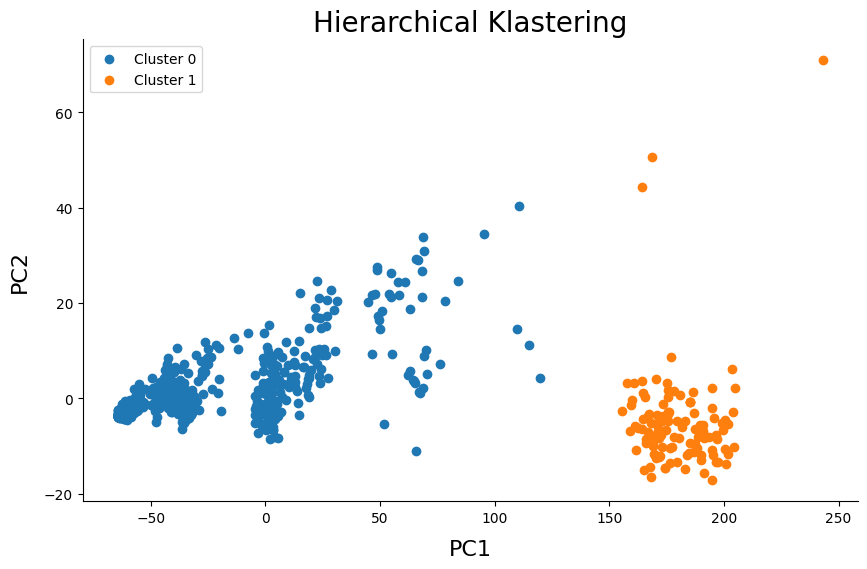

In [106]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering

n_clusters = 2
clustering = AgglomerativeClustering(n_clusters=n_clusters)
clusters = clustering.fit_predict(pca_df)

# Scatter plot of the clusters
plt.figure(figsize=(10, 6))

# Loop through unique cluster labels
for cluster_label in range(n_clusters):
    # Filter data points for current cluster label
    cluster_data = pca_df[clusters == cluster_label]
    # Scatter plot for current cluster label
    plt.scatter(cluster_data.iloc[:, 0], cluster_data.iloc[:, 1], label=f'Cluster {cluster_label}', marker='o')

plt.title('Hierarchical Klastering', fontsize=20)
plt.xlabel('PC1', fontsize=16, labelpad=10)
plt.ylabel('PC2', fontsize=16, labelpad=10)
plt.legend()
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

With relative sight, we can see that the optimal occurs when the cluster is 2. because the next amount of cluter just improve tiny bit score.

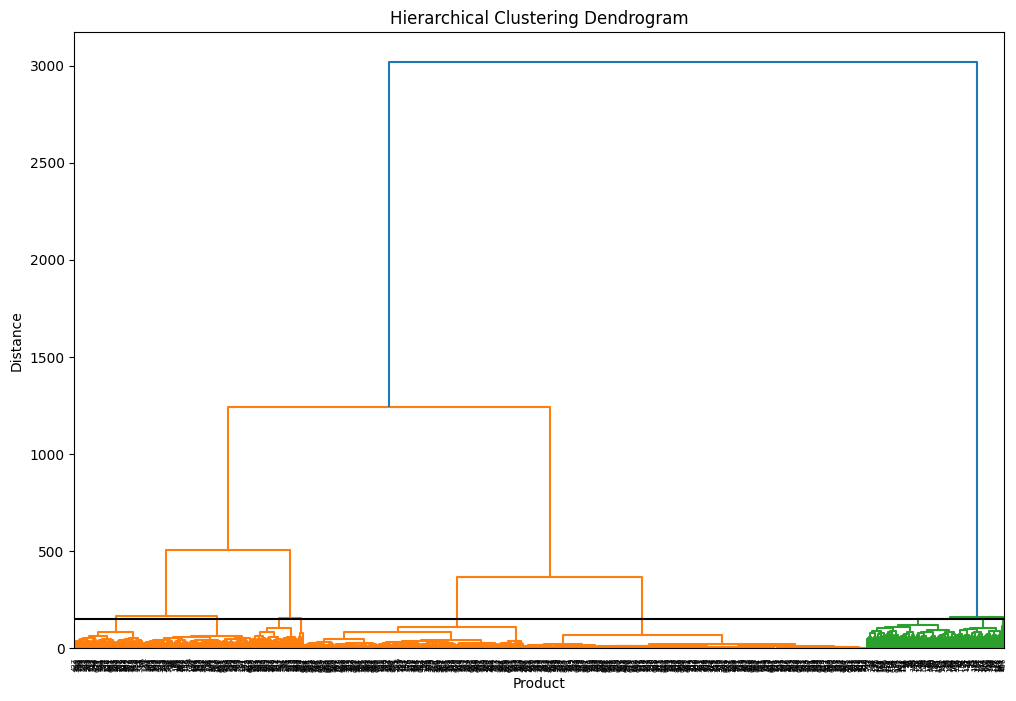

Cluster Assignments:
Product 0: Cluster 11
Product 1: Cluster 3
Product 2: Cluster 11
Product 3: Cluster 11
Product 4: Cluster 11
Product 5: Cluster 3
Product 6: Cluster 3
Product 7: Cluster 11
Product 8: Cluster 8
Product 9: Cluster 15
Product 10: Cluster 8
Product 11: Cluster 3
Product 12: Cluster 11
Product 13: Cluster 8
Product 14: Cluster 7
Product 15: Cluster 7
Product 16: Cluster 5
Product 17: Cluster 6
Product 18: Cluster 4
Product 19: Cluster 11
Product 20: Cluster 11
Product 21: Cluster 11
Product 22: Cluster 3
Product 23: Cluster 7
Product 24: Cluster 17
Product 25: Cluster 8
Product 26: Cluster 14
Product 27: Cluster 1
Product 28: Cluster 8
Product 29: Cluster 17
Product 30: Cluster 11
Product 31: Cluster 11
Product 32: Cluster 8
Product 33: Cluster 0
Product 34: Cluster 18
Product 35: Cluster 5
Product 36: Cluster 14
Product 37: Cluster 1
Product 38: Cluster 6
Product 39: Cluster 7
Product 40: Cluster 7
Product 41: Cluster 0
Product 42: Cluster 14
Product 43: Cluster 6
Pro

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

# Perform hierarchical clustering
n_clusters = 21  # Desired number of clusters
clustering = AgglomerativeClustering(n_clusters=n_clusters)
clusters = clustering.fit_predict(dfr)

# Create linkage matrix for dendrogram
linked = linkage(dfr, method='ward')  # Using 'ward' method to minimize variance within clusters

# Plot the dendrogram
plt.figure(figsize=(12, 8))
dendrogram(linked,
           orientation='top',
           labels=dfr.index.tolist(),  # Ensure labels are provided as a list
           distance_sort='descending',
           show_leaf_counts=True)

# Draw a horizontal line at the appropriate distance threshold to visualize 21 clusters
max_d = 150  # You might need to adjust this value to find the right threshold for 21 clusters
plt.axhline(y=max_d, c='k')

plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Product')
plt.ylabel('Distance')
plt.show()

# Print cluster assignments from AgglomerativeClustering
print("Cluster Assignments:")
for product, cluster in zip(dfr.index, clusters):
    print(f"Product {product}: Cluster {cluster}")


In [36]:
dfr.head()

,W0,W1,W2,W3,W4,W5,W6,W7,W8,W9,...,W42,W43,W44,W45,W46,W47,W48,W49,W50,W51
0,11,12,10,8,13,12,14,21,6,14,...,4,7,8,10,12,3,7,6,5,10
1,7,6,3,2,7,1,6,3,3,3,...,2,4,5,1,1,4,5,1,6,0
2,7,11,8,9,10,8,7,13,12,6,...,6,14,5,5,7,8,14,8,8,7
3,12,8,13,5,9,6,9,13,13,11,...,9,10,3,4,6,8,14,8,7,8
4,8,5,13,11,6,7,9,14,9,9,...,7,11,7,12,6,6,5,11,8,9


## Density Based

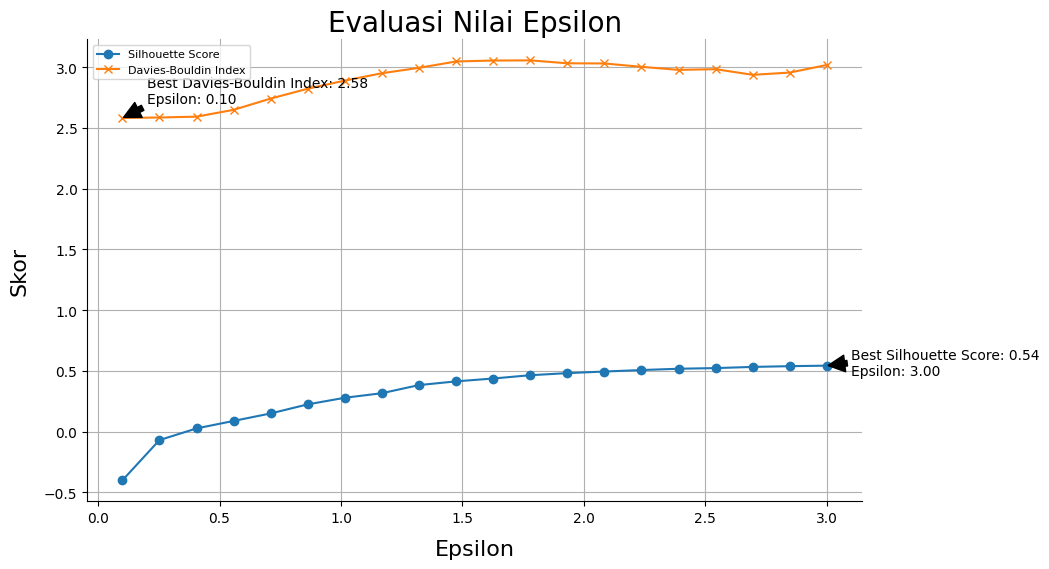

In [113]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN, KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Assuming pca_df contains your data with 2 features

# Step 3: Scale your data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(pca_df)

# Step 4: Grid search for the best epsilon value
min_eps = 0.1
max_eps = 3.0
epsilons = np.linspace(min_eps, max_eps, 20)
silhouette_scores = []
davies_bouldin_scores = []

for eps in epsilons:
    dbscan = DBSCAN(eps=eps)
    labels = dbscan.fit_predict(scaled_features)
    if len(np.unique(labels)) > 1:  # Silhouette score and Davies-Bouldin index require at least 2 clusters
        silhouette_scores.append(silhouette_score(scaled_features, labels))
        davies_bouldin_scores.append(davies_bouldin_score(scaled_features, labels))
    else:
        silhouette_scores.append(0)
        davies_bouldin_scores.append(0)

# Find the index of the maximum silhouette score
max_silhouette_index = np.argmax(silhouette_scores)
# Find the index of the minimum Davies-Bouldin index
min_davies_bouldin_index = np.argmin(davies_bouldin_scores)

# Step 5: Visualize the scores
plt.figure(figsize=(10, 6))
plt.plot(epsilons, silhouette_scores, marker='o', label='Silhouette Score')
plt.plot(epsilons, davies_bouldin_scores, marker='x', label='Davies-Bouldin Index')
plt.title('Evaluasi Nilai Epsilon', fontsize=20)
plt.xlabel('Epsilon', fontsize=16, labelpad=10)
plt.ylabel('Skor', fontsize=16, labelpad=10)
plt.legend(fontsize=8)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.grid(True)

# Annotate the best epsilon values for silhouette score and Davies-Bouldin index
plt.annotate(f'Best Silhouette Score: {silhouette_scores[max_silhouette_index]:.2f}\nEpsilon: {epsilons[max_silhouette_index]:.2f}',
             xy=(epsilons[max_silhouette_index], silhouette_scores[max_silhouette_index]),
             xytext=(epsilons[max_silhouette_index] + 0.1, silhouette_scores[max_silhouette_index] - 0.1),
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=10,
             horizontalalignment='left',
             verticalalignment='bottom')

plt.annotate(f'Best Davies-Bouldin Index: {davies_bouldin_scores[min_davies_bouldin_index]:.2f}\nEpsilon: {epsilons[min_davies_bouldin_index]:.2f}',
             xy=(epsilons[min_davies_bouldin_index], davies_bouldin_scores[min_davies_bouldin_index]),
             xytext=(epsilons[min_davies_bouldin_index] + 0.1, davies_bouldin_scores[min_davies_bouldin_index] + 0.1),
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=10,
             horizontalalignment='left',
             verticalalignment='bottom')

plt.show()

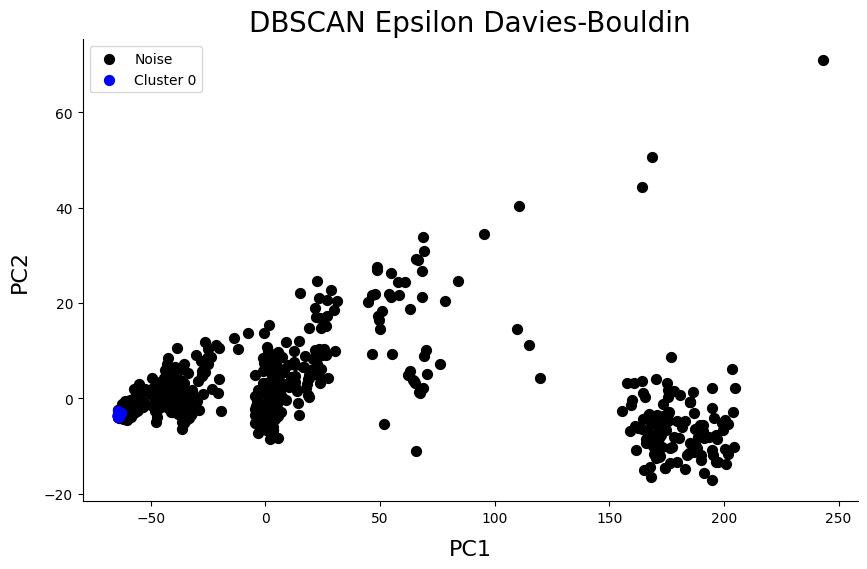

In [111]:
# Step 3: Scale your data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(pca_df)

# Step 4: Apply DBSCAN with a fixed epsilon value
eps = 0.10
dbscan = DBSCAN(eps=eps)
labels = dbscan.fit_predict(scaled_features)

# Step 6: Plot the clusters with different colors
unique_labels = np.unique(labels)
colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']

plt.figure(figsize=(10, 6))
for label in unique_labels:
    if label == -1:
        # Black used for noise.
        color = 'black'
        label_name = 'Noise'
    else:
        color = colors[label % len(colors)]
        label_name = f'Cluster {label}'

    plt.scatter(pca_df.iloc[labels == label, 0], pca_df.iloc[labels == label, 1], c=color, label=label_name, s=50)

plt.title("DBSCAN Epsilon Davies-Bouldin", fontsize=20)
plt.xlabel("PC1", fontsize=16, labelpad=10)
plt.ylabel("PC2", fontsize=16, labelpad=10)
plt.legend()
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

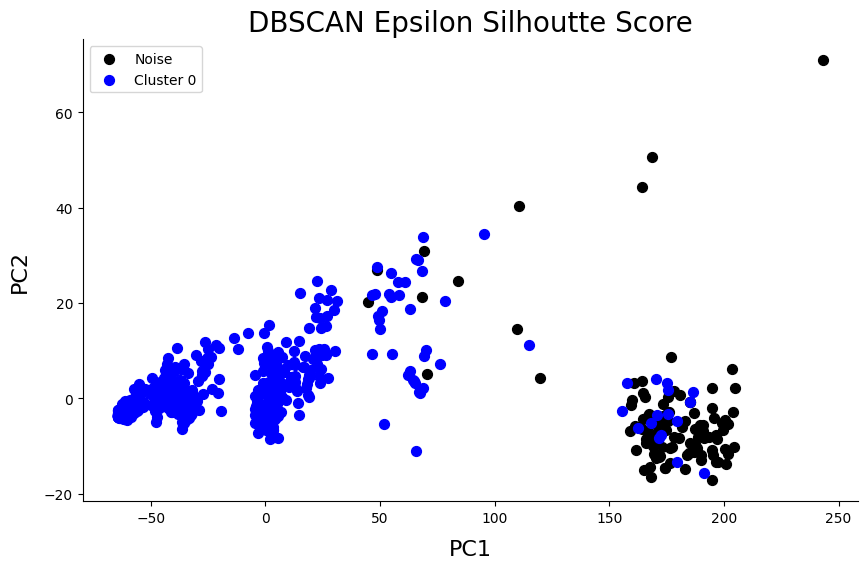

In [112]:
# Step 3: Scale your data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(pca_df)

# Step 4: Apply DBSCAN with a fixed epsilon value
eps = 3.0
dbscan = DBSCAN(eps=eps)
labels = dbscan.fit_predict(scaled_features)

# Step 6: Plot the clusters with different colors
unique_labels = np.unique(labels)
colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']

plt.figure(figsize=(10, 6))
for label in unique_labels:
    if label == -1:
        # Black used for noise.
        color = 'black'
        label_name = 'Noise'
    else:
        color = colors[label % len(colors)]
        label_name = f'Cluster {label}'

    plt.scatter(pca_df.iloc[labels == label, 0], pca_df.iloc[labels == label, 1], c=color, label=label_name, s=50)

plt.title("DBSCAN Epsilon Silhoutte Score", fontsize=20)
plt.xlabel("PC1", fontsize=16, labelpad=10)
plt.ylabel("PC2", fontsize=16, labelpad=10)
plt.legend()
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

## K-Means

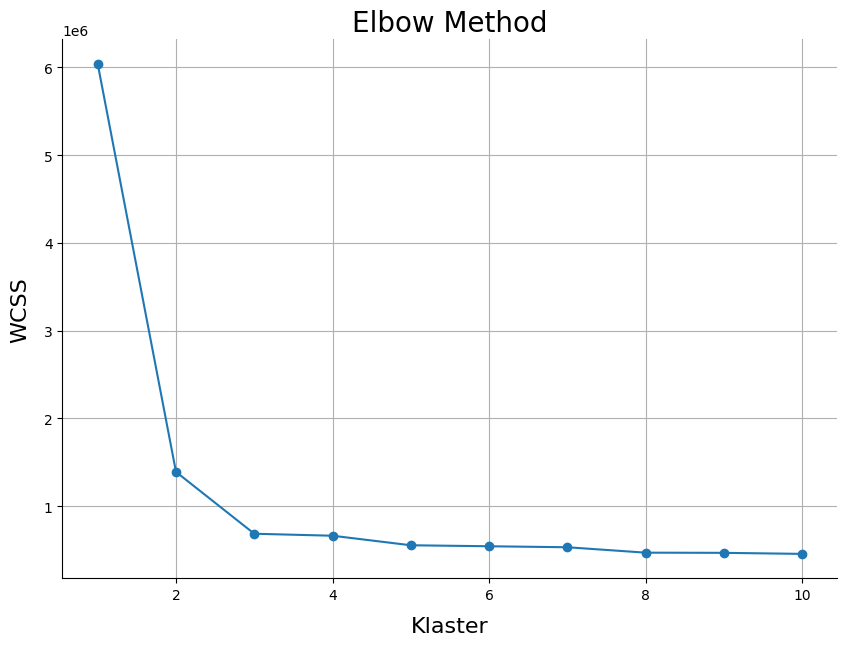

In [117]:
# Step 3: Create an elbow plot to find the optimal number of clusters
wcss = []
range_n_clusters = range(1, 11)
for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(dfr)
    wcss.append(kmeans.inertia_)

# Plot the elbow plot
plt.figure(figsize=(10, 7))
plt.plot(range_n_clusters, wcss, marker='o')
plt.title('Elbow Method', fontsize=20)
plt.xlabel('Klaster', fontsize=16, labelpad=10)
plt.ylabel('WCSS', fontsize=16, labelpad=10)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.grid(True)
plt.show()  

From relative view to find the elbow we can see that elbow occurs when the clusters is 3 

# Analysis of Cluster Results Comparation 

# Conclusion